In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install kaggle

In [ ]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 72 Jul 13 07:20 kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c pubg-finish-placement-prediction

 93% 226M/244M [00:07<00:00, 29.0MB/s]
100% 244M/244M [00:07<00:00, 33.7MB/s]
 29% 5.00M/17.0M [00:00<00:01, 8.13MB/s]
100% 17.0M/17.0M [00:00<00:00, 24.8MB/s]
 88% 88.0M/100M [00:03<00:00, 21.1MB/s]
100% 100M/100M [00:03<00:00, 29.4MB/s] 


In [ ]:
!ls

kaggle.json  sample_submission_V2.csv.zip  train_V2.csv.zip
sample_data  test_V2.csv.zip


In [ ]:
!unzip train_V2.csv.zip

Archive:  train_V2.csv.zip
  inflating: train_V2.csv            


In [ ]:
!unzip test_V2.csv.zip

Archive:  test_V2.csv.zip
  inflating: test_V2.csv             


In [ ]:
!unzip sample_submission_V2.csv.zip

Archive:  sample_submission_V2.csv.zip
  inflating: sample_submission_V2.csv  


In [ ]:
train = pd.read_csv('train_V2.csv')
test = pd.read_csv('test_V2.csv')
submission = pd.read_csv('sample_submission_V2.csv')

In [ ]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


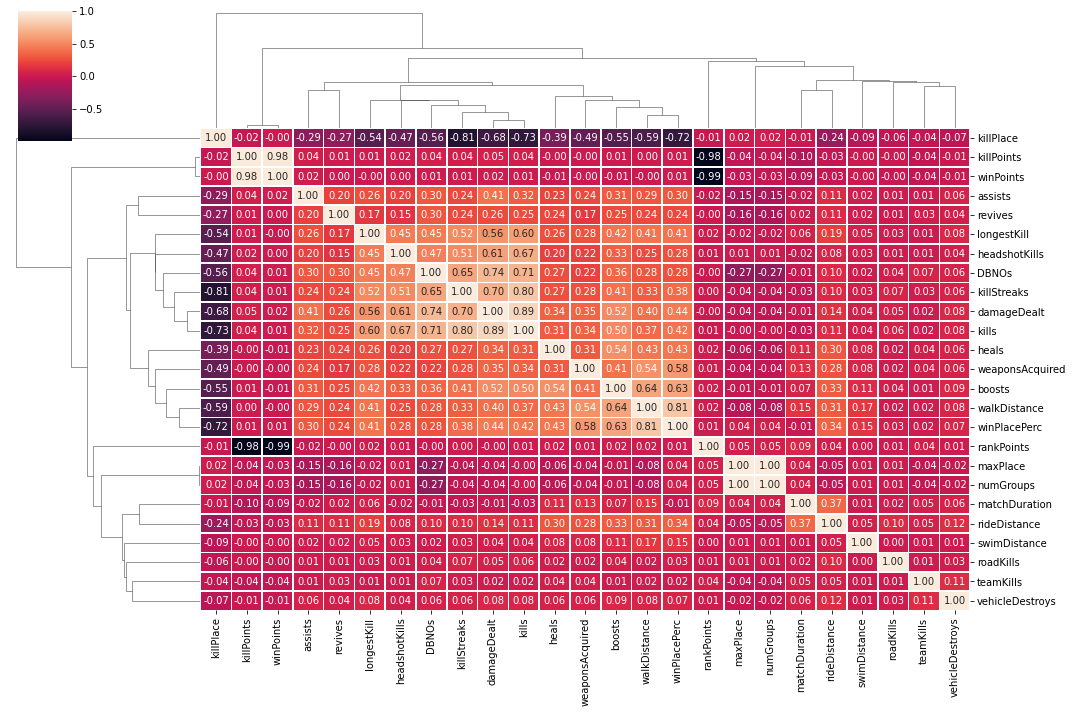

In [ ]:
ax = sns.clustermap(train.corr(), annot=True, linewidth=.6, fmt='.2f', figsize=(15, 10))
plt.show()

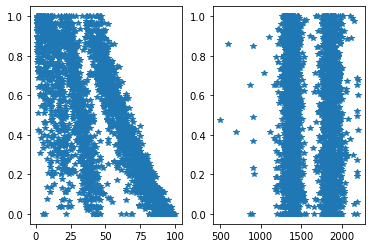

In [ ]:
killPlace = train['killPlace'][:3000]
matchDuration = train['matchDuration'][:3000]
winPlacePerc = train['winPlacePerc'][:3000]

plt.subplot(121)
plt.plot(killPlace, winPlacePerc, '*')
plt.subplot(122)
plt.plot(matchDuration, winPlacePerc, '*')

In [ ]:
train = train.drop('Id', axis=1)
train = train.drop('groupId', axis=1)
train = train.drop('matchId', axis=1)
train = train.drop('assists', axis=1)
train = train.drop('killPlace', axis=1)
train = train.drop('killPoints', axis=1)
train = train.drop('killStreaks', axis=1)
train = train.drop('longestKill', axis=1)
train = train.drop('matchType', axis=1)
train = train.drop('maxPlace', axis=1)
train = train.drop('numGroups', axis=1)
train = train.drop('rankPoints', axis=1)
train = train.drop('revives', axis=1)
train = train.drop('rideDistance', axis=1)
train = train.drop('roadKills', axis=1)
train = train.drop('swimDistance', axis=1)
train = train.drop('teamKills', axis=1)
train = train.drop('vehicleDestroys', axis=1)
train = train.drop('walkDistance', axis=1)
train = train.drop('winPoints', axis=1)

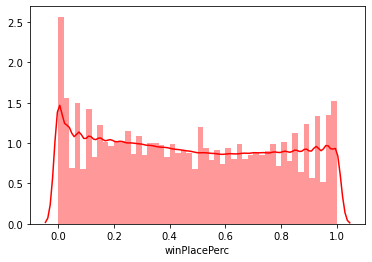

In [ ]:
sns.distplot(train['winPlacePerc'], color = 'red')
plt.show()

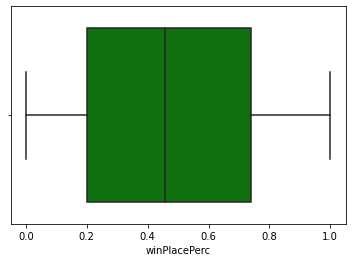

In [ ]:
sns.boxplot(x='winPlacePerc', color = 'green', data = train)
plt.show()

In [ ]:
train['boostheal'] = train['boosts'] + train['heals']
train['kill'] = train['DBNOs'] + train['headshotKills'] + train['kills']
train = train.drop(['boosts', 'heals', 'kills', 'DBNOs', 'headshotKills'], axis=1)

In [ ]:
test = test.drop('Id', axis=1)
test = test.drop('groupId', axis=1)
test = test.drop('matchId', axis=1)
test = test.drop('assists', axis=1)
test = test.drop('killPlace', axis=1)
test = test.drop('killPoints', axis=1)
test = test.drop('killStreaks', axis=1)
test = test.drop('longestKill', axis=1)
test = test.drop('matchType', axis=1)
test = test.drop('maxPlace', axis=1)
test = test.drop('numGroups', axis=1)
test = test.drop('rankPoints', axis=1)
test = test.drop('revives', axis=1)
test = test.drop('rideDistance', axis=1)
test = test.drop('roadKills', axis=1)
test = test.drop('swimDistance', axis=1)
test = test.drop('teamKills', axis=1)
test = test.drop('vehicleDestroys', axis=1)
test = test.drop('walkDistance', axis=1)
test = test.drop('winPoints', axis=1)

In [ ]:
test['boostheal'] = test['boosts'] + test['heals']
test['kill'] = test['DBNOs'] + test['headshotKills'] + test['kills']
test = test.drop(['boosts', 'heals', 'kills', 'DBNOs', 'headshotKills'], axis=1)

In [ ]:
train = train.dropna(axis = 0)
test = test.dropna(axis = 0)

In [ ]:
train = train[['damageDealt', 'matchDuration', 'weaponsAcquired', 'boostheal', 'kill', 'winPlacePerc']]

In [ ]:
train

,damageDealt,matchDuration,weaponsAcquired,boostheal,kill,winPlacePerc
0,0.00,1306,1,0,0,0.4444
1,91.47,1777,5,0,0,0.6400
2,68.00,1318,2,0,0,0.7755
3,32.90,1436,3,0,0,0.1667
4,100.00,1424,2,0,1,0.1875
...,...,...,...,...,...,...
4446961,0.00,1873,3,0,0,0.1786
4446962,44.15,1435,6,1,0,0.2935
4446963,59.06,1321,4,0,0,0.4815
4446964,180.40,1373,8,6,4,0.8000


In [ ]:
test

,damageDealt,matchDuration,weaponsAcquired,boostheal,kill
0,51.46,1884,1,0,0
1,179.10,1811,6,6,2
2,23.40,1793,4,4,0
3,65.52,1834,3,0,0
4,330.20,1326,4,5,6
...,...,...,...,...,...
1934169,381.00,1292,5,9,7
1934170,0.00,1301,3,0,0
1934171,91.96,1314,3,3,1
1934172,138.60,1333,4,14,1


In [ ]:
train1 = train.values
X_train = train1[:,0:5]
Y_train = train1[:,-1]
print(X_train.shape)
print(Y_train.shape)

(4446965, 5)
(4446965,)


In [ ]:
X_train

array([[0.000e+00, 1.306e+03, 1.000e+00, 0.000e+00, 0.000e+00],
       [9.147e+01, 1.777e+03, 5.000e+00, 0.000e+00, 0.000e+00],
       [6.800e+01, 1.318e+03, 2.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [5.906e+01, 1.321e+03, 4.000e+00, 0.000e+00, 0.000e+00],
       [1.804e+02, 1.373e+03, 8.000e+00, 6.000e+00, 4.000e+00],
       [2.680e+02, 1.766e+03, 5.000e+00, 3.000e+00, 2.000e+00]])

In [ ]:
Y_train

array([0.4444, 0.64  , 0.7755, ..., 0.4815, 0.8   , 0.5464])

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(4446965, 5)
(4446965,)


In [ ]:
X_train = X_train[:5000]
Y_train = Y_train[:5000]

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb = XGBClassifier(n_estimators=5, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=5, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
X_test = test.values
X_test = X_test[:5000]
print(X_test)

[[5.146e+01 1.884e+03 1.000e+00 0.000e+00 0.000e+00]
 [1.791e+02 1.811e+03 6.000e+00 6.000e+00 2.000e+00]
 [2.340e+01 1.793e+03 4.000e+00 4.000e+00 0.000e+00]
 ...
 [1.839e+02 1.895e+03 6.000e+00 0.000e+00 0.000e+00]
 [7.500e+01 1.382e+03 4.000e+00 0.000e+00 1.000e+00]
 [1.692e+02 1.378e+03 1.000e+01 0.000e+00 2.000e+00]]


In [ ]:
result = xgb.predict(X_test)

In [ ]:
print(result)

[0.   1.   1.   ... 0.   0.5  0.75]


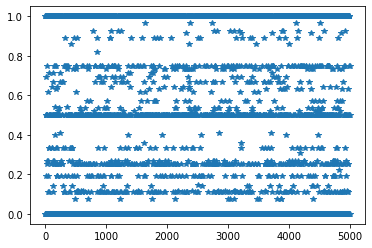

In [ ]:
plt.plot(result, '*')